# Import thư viện

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import gradio as gr
from sklearn.linear_model import LinearRegression


In [93]:
# Đọc dữ liệu lên DataFrame
dataFrame = pd.read_csv('DATA/train-data.csv')

# THỐNG KÊ VÀ TÌM HIỂU DỮ LIỆU

---



In [94]:
# Hiển thị 15 dòng dữ liệu đầu tiên
dataFrame.head(15)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [95]:
# In thông tin các cột trong DF
dataFrame.info()
print('Shape tập dữ liệu: ', dataFrame.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB
Shape tập dữ liệu:  (6019, 14)


## Phân tích các cột dữ liệu kiểu phi số

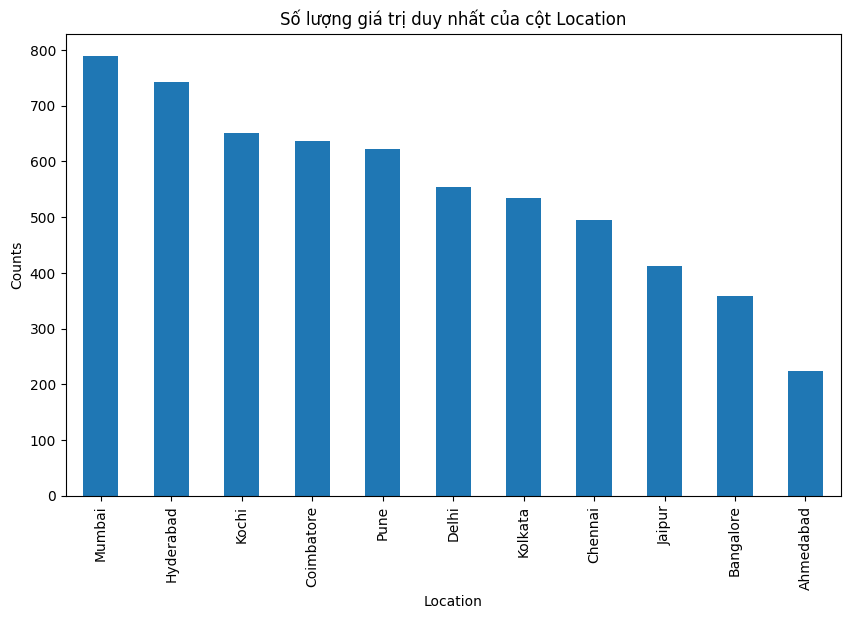

In [96]:
def plt_categories_counts(label_name):
    counts = dataFrame[label_name].value_counts()
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(f'Số lượng giá trị duy nhất của cột {label_name}')
    plt.xlabel(label_name)
    plt.ylabel('Counts')
    plt.show()

# Đếm các giá trị duy nhất của các cột có Dtype phi số
plt_categories_counts('Location')

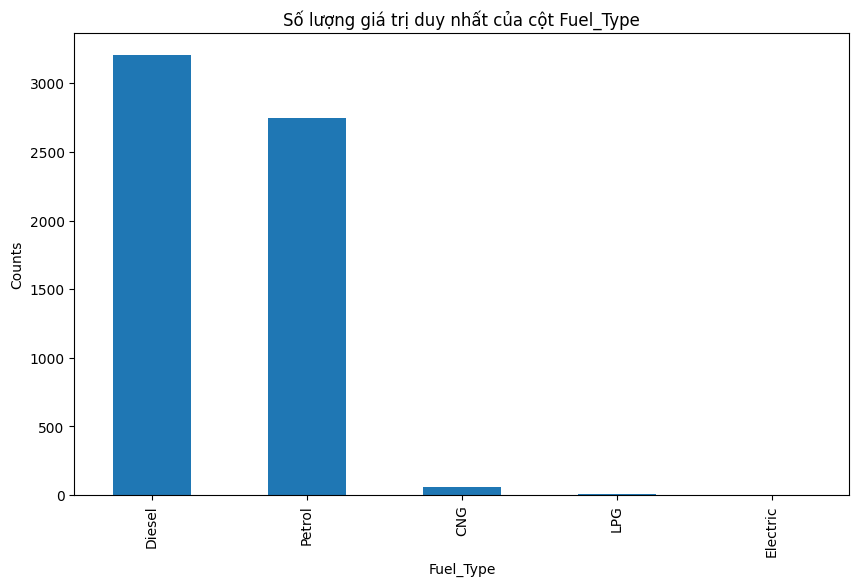

In [97]:
plt_categories_counts('Fuel_Type')

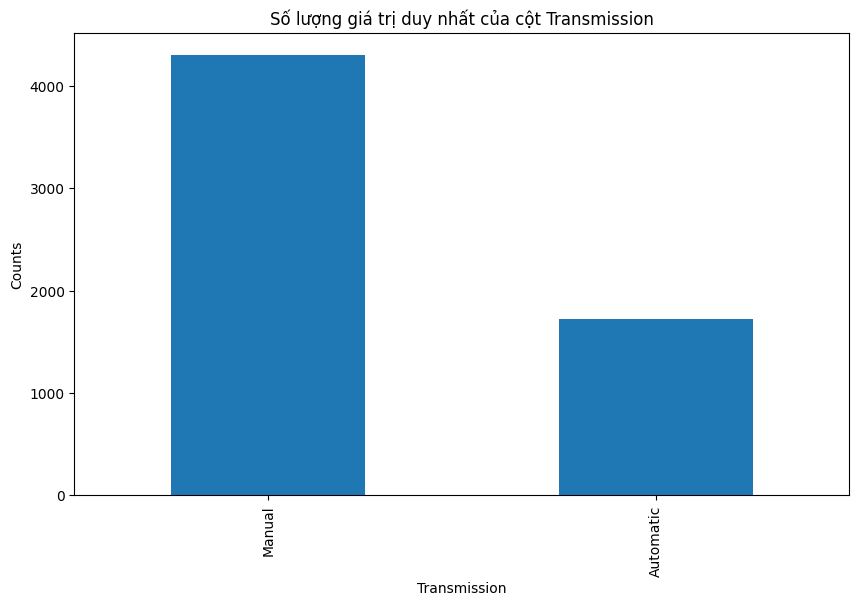

In [98]:
plt_categories_counts('Transmission')

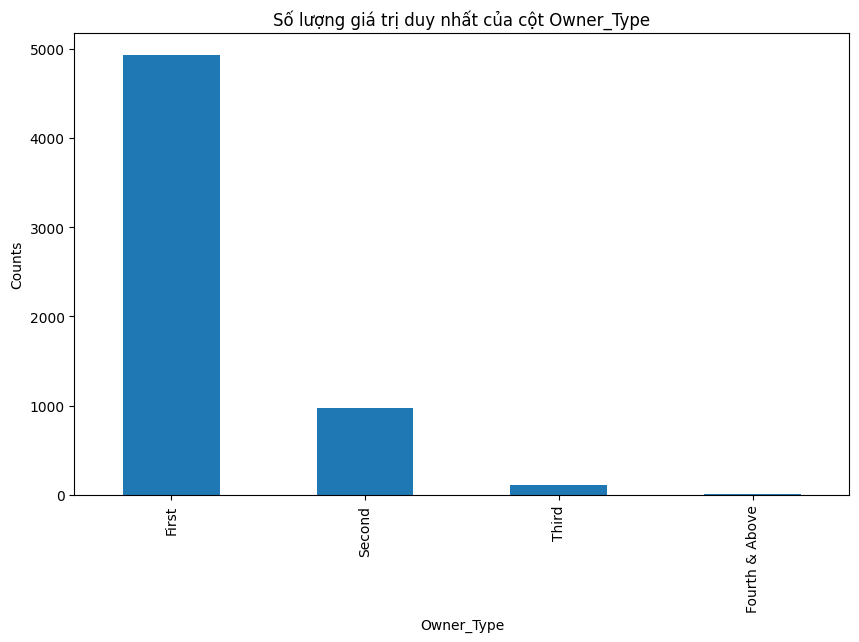

In [99]:
plt_categories_counts('Owner_Type')

In [100]:
def categories_counts(label_name):
    print(f'-----------------------------------------------')
    print(f'Số các giá trị duy nhất của cột {label_name}:')
    print(dataFrame[label_name].value_counts())

# Đếm các giá trị duy nhất của các cột có Dtype phi số
categories_counts('Location')
categories_counts('Fuel_Type')
categories_counts('Transmission')
categories_counts('Owner_Type')

-----------------------------------------------
Số các giá trị duy nhất của cột Location:
Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột Fuel_Type:
Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột Transmission:
Transmission
Manual       4299
Automatic    1720
Name: count, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột Owner_Type:
Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64


## Kiểm tra mức độ sạch của dữ liệu

In [101]:
def statistical_missing_data():
    missing_data = dataFrame.isnull().sum()
    duplicate_data = dataFrame.duplicated().sum()

    print("Số liệu thiếu trong mỗi cột:")
    print(missing_data)
    print("\nSố liệu trùng lặp:")
    print(duplicate_data)

# Thống kê dữ liệu khuyết
statistical_missing_data()

Số liệu thiếu trong mỗi cột:
Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Số liệu trùng lặp:
0


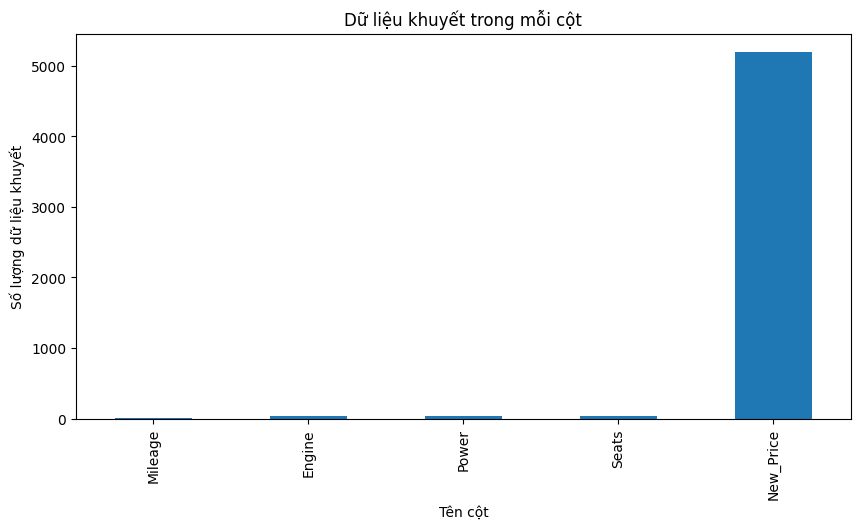


Số liệu trùng lặp: 0


In [102]:
def plt_statistics_missing_data(dataFrame):
    # Dữ liệu khuyết
    missing_data = dataFrame.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    plt.figure(figsize=(10, 5))
    missing_data.plot(kind='bar')
    plt.title('Dữ liệu khuyết trong mỗi cột')
    plt.xlabel('Tên cột')
    plt.ylabel('Số lượng dữ liệu khuyết')
    plt.show()

    # Dữ liệu lặp
    duplicate_data = dataFrame.duplicated().sum()
    print("\nSố liệu trùng lặp:", duplicate_data)

# Thống kê dữ liệu khuyết
plt_statistics_missing_data(dataFrame)

## Loại bỏ cột

In [103]:
print('Shape tập dữ liệu trước khi xóa cột:\t', dataFrame.shape)

# Xóa cột New_Price vì có nhiều ô chứa giá trị NULL
dataFrame = dataFrame.drop('New_Price', axis=1)

# Bỏ các cột không còn cần thiết
dataFrame = dataFrame.drop(columns = ['Unnamed: 0', 'Name', 'Location'])

print('Shape tập dữ liệu sau khi xóa cột:\t', dataFrame.shape)

Shape tập dữ liệu trước khi xóa cột:	 (6019, 14)
Shape tập dữ liệu sau khi xóa cột:	 (6019, 10)


In [104]:
# Kết quả sau khi xóa cột
dataFrame.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


## Trích xuất các giá trị số

In [105]:
# Trích xuất giá trị số từ cột 'Engine_Number' và chuyển đổi thành kiểu số
dataFrame['Engine'] = dataFrame['Engine'].str.extract('(\d+)')
dataFrame['Engine'] = pd.to_numeric(dataFrame['Engine'], errors='coerce')
# dataFrame['Engine'] = dataFrame['Engine'].astype('int64')
# Co gia tri NULL nen khong chuyen ve int64


# Trích xuất giá trị số từ cột 'Power_Number' và chuyển đổi thành kiểu số
dataFrame['Power'] = dataFrame['Power'].str.extract('(\d+\.*\d*)')
dataFrame['Power'] = pd.to_numeric(dataFrame['Power'], errors='coerce')

# Kết quả
dataFrame.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74


In [106]:
# Chuyển đổi giá trị 'Mileage' từ km/kg sang kmpl
def convert_mileage(x):
    if pd.isna(x):
        return x  # Return NaN
    elif 'km/kg' in x:
        return float(x.split()[0]) * 2.352
    else:
        return float(x.split()[0])

dataFrame['Mileage'] = dataFrame['Mileage'].apply(convert_mileage)

# Kết quả
dataFrame.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,62.5632,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,17.74


## Kiểm tra lại dữ liệu khuyết sau khi trích xuất các giá trị số

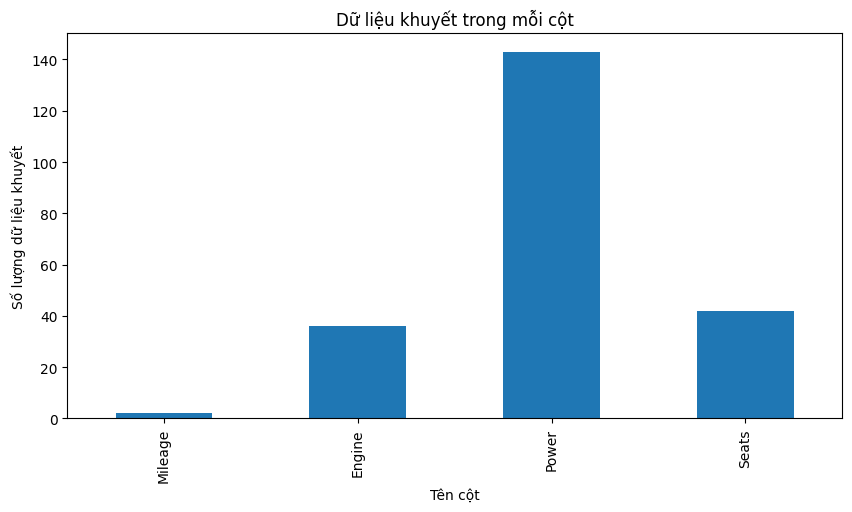


Số liệu trùng lặp: 2


In [107]:
# Thống kê dữ liệu khuyết
plt_statistics_missing_data(dataFrame)

In [108]:
# Thống kê dữ liệu khuyết sau khi trích xuất giá trị số
statistical_missing_data()

Số liệu thiếu trong mỗi cột:
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

Số liệu trùng lặp:
2


## Điền khuyết dữ liệu

### Lựa chọn giá trị điền khuyết


In [109]:
# Đếm các giá trị duy nhất của các cột có Dtype phi số
# để xác định giá trị mode
categories_counts('Engine')
categories_counts('Power')
categories_counts('Mileage')
categories_counts('Seats')

-----------------------------------------------
Số các giá trị duy nhất của cột Engine:
Engine
1197.0    606
1248.0    512
1498.0    304
998.0     259
2179.0    240
         ... 
2999.0      1
2147.0      1
2495.0      1
3200.0      1
1797.0      1
Name: count, Length: 146, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột Power:
Power
74.00     235
98.60     131
73.90     125
140.00    123
88.50     112
         ... 
80.90       1
68.10       1
301.73      1
174.57      1
181.04      1
Name: count, Length: 369, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột Mileage:
Mileage
18.9000    172
17.0000    172
18.6000    119
20.3600     88
21.1000     86
          ... 
27.2800      1
14.5700      1
53.6256      1
8.0000       1
17.2400      1
Name: count, Length: 442, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột Seats:
Seats
5.0     5014
7.0      674
8.0   

### Điền khuyết giữ liệu

In [110]:
# Điền khuyết bằng giá trị Mode
def fillna_with_mode(col_name):
    mode_value = dataFrame[col_name].mode().iloc[0]
    dataFrame[col_name].fillna(mode_value, inplace=True)

fillna_with_mode('Engine')
fillna_with_mode('Power')
fillna_with_mode('Mileage')
fillna_with_mode('Seats')

# Kết quả
dataFrame.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,62.5632,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,17.74


In [111]:
# Kết quả sau khi điền khuyết
statistical_missing_data()

Số liệu thiếu trong mỗi cột:
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Số liệu trùng lặp:
2


In [112]:
# Tìm các giá trị duy nhất để chuẩn bị từ điển mapping
categories_counts('Fuel_Type')
categories_counts('Transmission')
categories_counts('Owner_Type')

-----------------------------------------------
Số các giá trị duy nhất của cột Fuel_Type:
Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột Transmission:
Transmission
Manual       4299
Automatic    1720
Name: count, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột Owner_Type:
Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64


In [113]:
# Ánh xạ các giá trị phân loại thành nhãn kiểu số
def map_categorical(col_name, dictionary):
    dataFrame[col_name] = dataFrame[col_name].map(dictionary)

fuel_type_mapping = {'CNG': 1, 'Diesel': 2, 'Petrol': 3, 'LPG': 4, 'Electric': 5}
transmission_type_mapping = {'Manual': 1, 'Automatic': 2}
owner_type_mapping = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}

map_categorical('Fuel_Type', fuel_type_mapping)
map_categorical('Transmission', transmission_type_mapping)
map_categorical('Owner_Type', owner_type_mapping)

# Kết quả sau khi ánh xạ
dataFrame.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,1,1,1,62.5632,998.0,58.16,5.0,1.75
1,2015,41000,2,1,1,19.6700,1582.0,126.20,5.0,12.50
2,2011,46000,3,1,1,18.2000,1199.0,88.70,5.0,4.50
3,2012,87000,2,1,1,20.7700,1248.0,88.76,7.0,6.00
4,2013,40670,2,2,2,15.2000,1968.0,140.80,5.0,17.74


# TÓM LƯỢC DỮ LIỆU

In [114]:
def describe_data(df):
    data_describe = {
        'Count': df.count(),
        'Min': df.min(),
        'Max': df.max(),
        'Mean': df.mean(),
        'Mode': df.mode().iloc[0], # mode() return a DataFrame
        '25%': df.quantile(0.25),
        '50%': df.median(),
        '75%': df.quantile(0.75),
        'IQR': df.quantile(0.75) - df.quantile(0.25),
        'Variance': df.var(),
        'STD': df.std()
    }
    return pd.DataFrame(data_describe).T

describe_data(dataFrame)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
Min,1998.000000,1.710000e+02,1.000000,1.000000,1.000000,0.000000,72.000000,34.200000,0.000000,0.440000
Max,2019.000000,6.500000e+06,5.000000,2.000000,4.000000,78.886080,5998.000000,560.000000,10.000000,160.000000
Mean,2013.358199,5.873838e+04,2.451238,1.285762,1.202858,18.497856,1618.738827,112.320472,5.276790,9.479468
Mode,2014.000000,6.000000e+04,2.000000,1.000000,1.000000,17.000000,1197.000000,74.000000,5.000000,4.500000
25%,2011.000000,3.400000e+04,2.000000,1.000000,1.000000,15.260000,1197.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,2.000000,1.000000,1.000000,18.180000,1493.000000,91.100000,5.000000,5.640000
75%,2016.000000,7.300000e+04,3.000000,2.000000,1.000000,21.100000,1969.000000,138.030000,5.000000,9.950000
IQR,5.000000,3.900000e+04,1.000000,1.000000,0.000000,5.840000,772.000000,64.030000,0.000000,6.450000
Variance,10.691214,8.330002e+09,0.271592,0.204136,0.208260,39.418055,360535.228886,2869.284190,0.650194,125.169489


In [115]:
dataFrame['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

(0.0, 160.0)

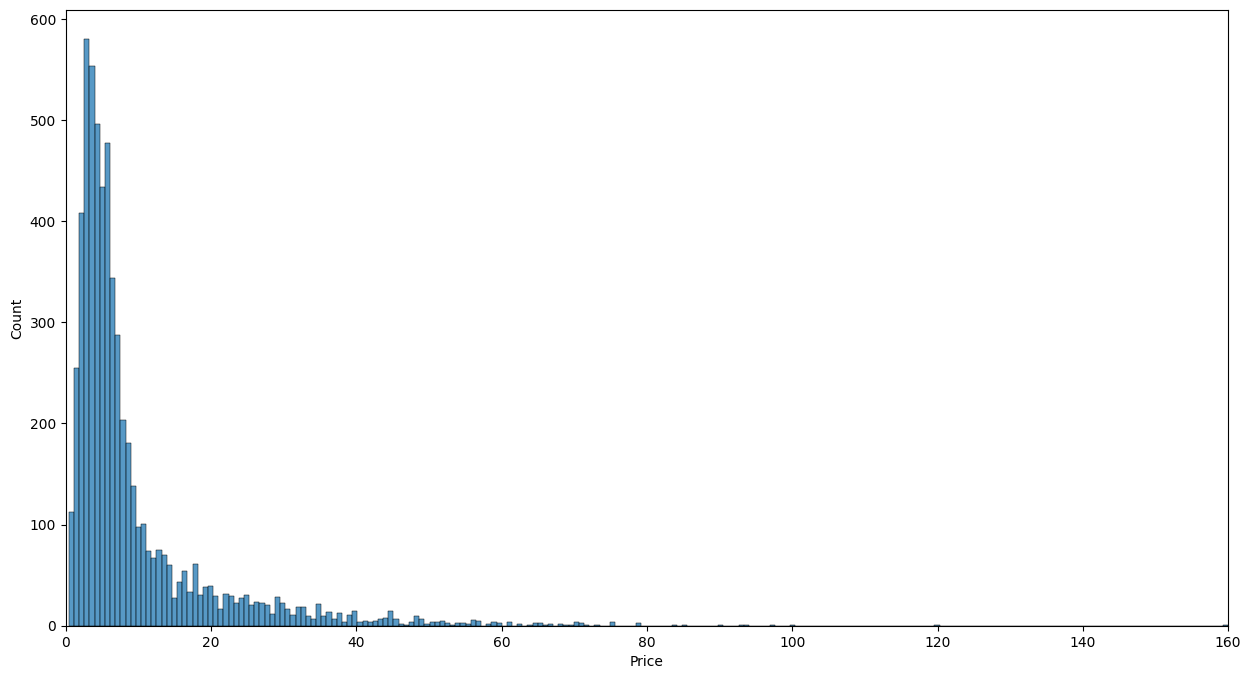

In [116]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(dataFrame['Price'])
plt.xlim([0,160])

# CHUYỂN ĐỔI DỮ LIỆU

In [117]:
# from sklearn.preprocessing import MinMaxScaler

# def min_max_nor(data, column):
#     col = np.array(data[column]).reshape(-1, 1)
#     scaler = MinMaxScaler()
#     data[column] = scaler.fit_transform(col)
#     return data

# # Example usage:
# df_minmax_nor = min_max_nor(dataFrame, 'Power')
# df_minmax_nor.head(10)

# print("=============================================")

# from sklearn.preprocessing import MinMaxScaler

# def min_max_nor(data, column):
#     col = np.array(data[column]).reshape(-1, 1)
#     scaler = MinMaxScaler()
#     data[column] = scaler.fit_transform(col)
#     return data

# # Example usage:
# df_minmax_nor = min_max_nor(dataFrame, 'Mileage')
# df_minmax_nor.head(10)

In [118]:
# column1 = dataFrame['Power']
# column2 = dataFrame['Price']
# plt.scatter(column1, column2, label='Dữ liệu', color='blue', marker='o')
# plt.title('Biểu đồ Scatter')
# plt.xlabel('Power')
# plt.ylabel('Price')
# # Hiển thị chú thích (nếu cần)
# plt.legend()
# plt.show()

In [119]:
# find the correlation among the columns in the Dataframe
dataFrame.corr()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.173048,-0.130269,0.097059,-0.397152,0.239399,-0.046288,0.039699,0.015204,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.098833,-0.025663,0.085337,-0.049155,0.090476,0.029932,0.082782,-0.011493
Fuel_Type,-0.130269,-0.098833,1.000000,-0.113006,0.041949,-0.241335,-0.383721,-0.253485,-0.286592,-0.289585
Transmission,0.097059,-0.025663,-0.113006,1.000000,-0.008797,-0.279767,0.498935,0.641545,-0.074838,0.586025
Owner_Type,-0.397152,0.085337,0.041949,-0.008797,1.000000,-0.119161,0.047627,0.013560,0.012210,-0.097557
Mileage,0.239399,-0.049155,-0.241335,-0.279767,-0.119161,1.000000,-0.478918,-0.405810,-0.240610,-0.255692
Engine,-0.046288,0.090476,-0.383721,0.498935,0.047627,-0.478918,1.000000,0.860401,0.393849,0.657196
Power,0.039699,0.029932,-0.253485,0.641545,0.013560,-0.405810,0.860401,1.000000,0.105539,0.770415
Seats,0.015204,0.082782,-0.286592,-0.074838,0.012210,-0.240610,0.393849,0.105539,1.000000,0.052811
Price,0.305327,-0.011493,-0.289585,0.586025,-0.097557,-0.255692,0.657196,0.770415,0.052811,1.000000


<Axes: >

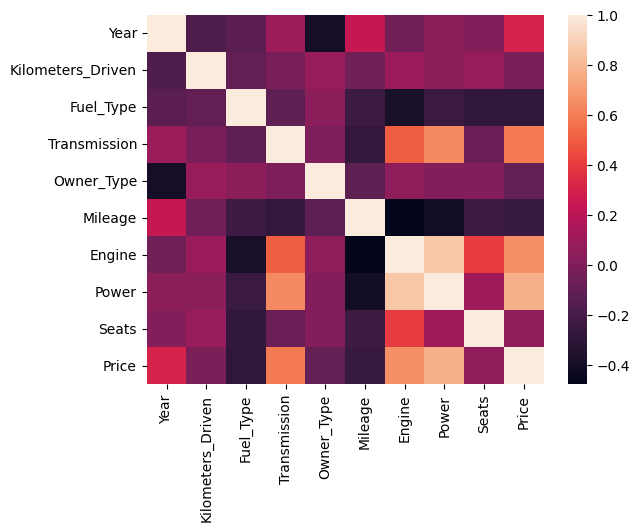

In [120]:
sns.heatmap(dataFrame.corr())

In [121]:
# Kết quả sau khi điền khuyết
statistical_missing_data()

Số liệu thiếu trong mỗi cột:
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Số liệu trùng lặp:
2


# Mô tả dữ liệu

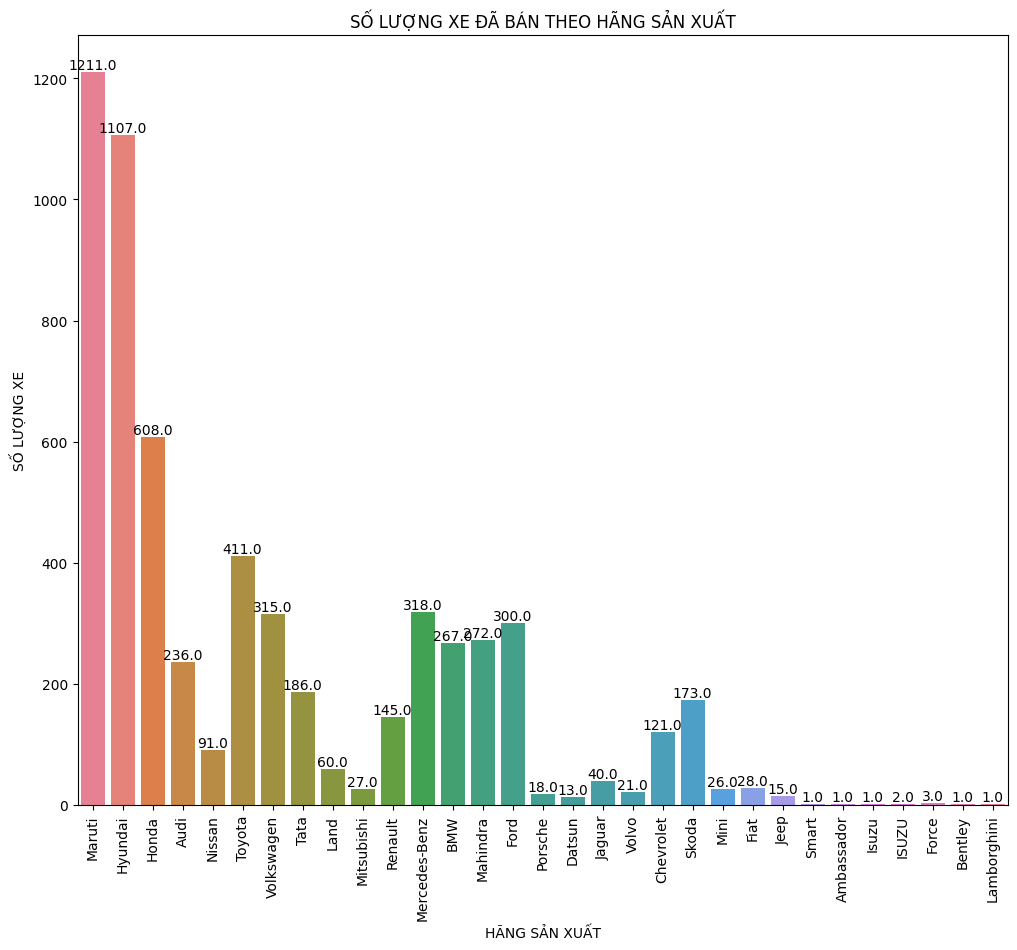

In [122]:
test = pd.read_csv('DATA/train-data.csv')

# Tach cot 'Name' va tao cot moi la 'Manufacture'
split_name = test["Name"].str.split(" ", expand=True)
test["Manufacturer"] = split_name[0]

# Dat mau cho cac cot
colors = sns.color_palette("husl", len(test["Manufacturer"].unique()))

# Tao cac cot voi mau chi dinh
plt.figure(figsize=(12, 10))
plot = sns.countplot(x='Manufacturer', data=test, palette=colors)
plt.xticks(rotation=90)

# Annotate the count values on the plot
for p in plot.patches:
    plot.annotate (
        p.get_height(),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title("SỐ LƯỢNG XE ĐÃ BÁN THEO HÃNG SẢN XUẤT")
plt.xlabel("HÃNG SẢN XUẤT")
plt.ylabel("SỐ LƯỢNG XE")

# Show the plot
plt.show()


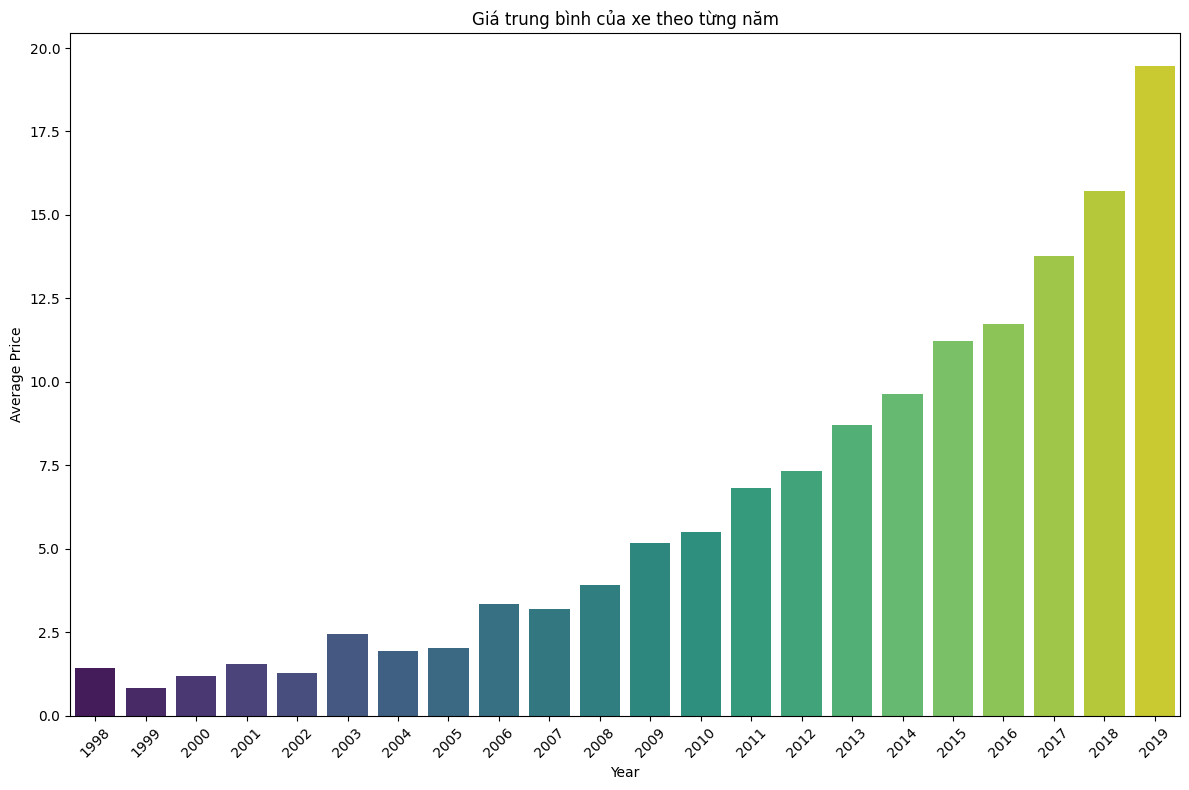

In [123]:
average_prices = test.groupby('Year')['Price'].mean().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
sns.barplot(data=average_prices, x='Year', y='Price', palette='viridis')
plt.title('Giá trung bình của xe theo từng năm')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

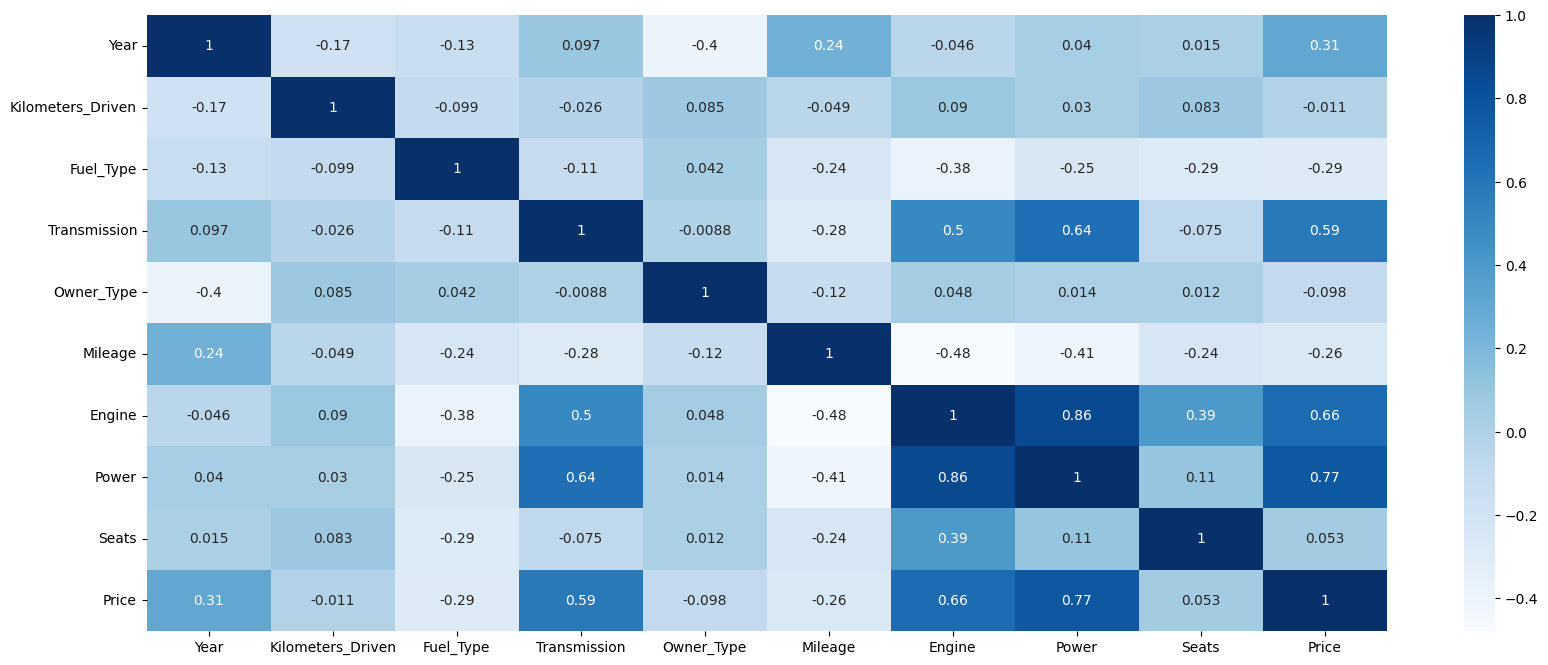

In [124]:
plt.figure(figsize = (20,8))
sns.heatmap(dataFrame.corr(numeric_only = True), annot = True, cmap = plt.cm.Blues)
plt.show()

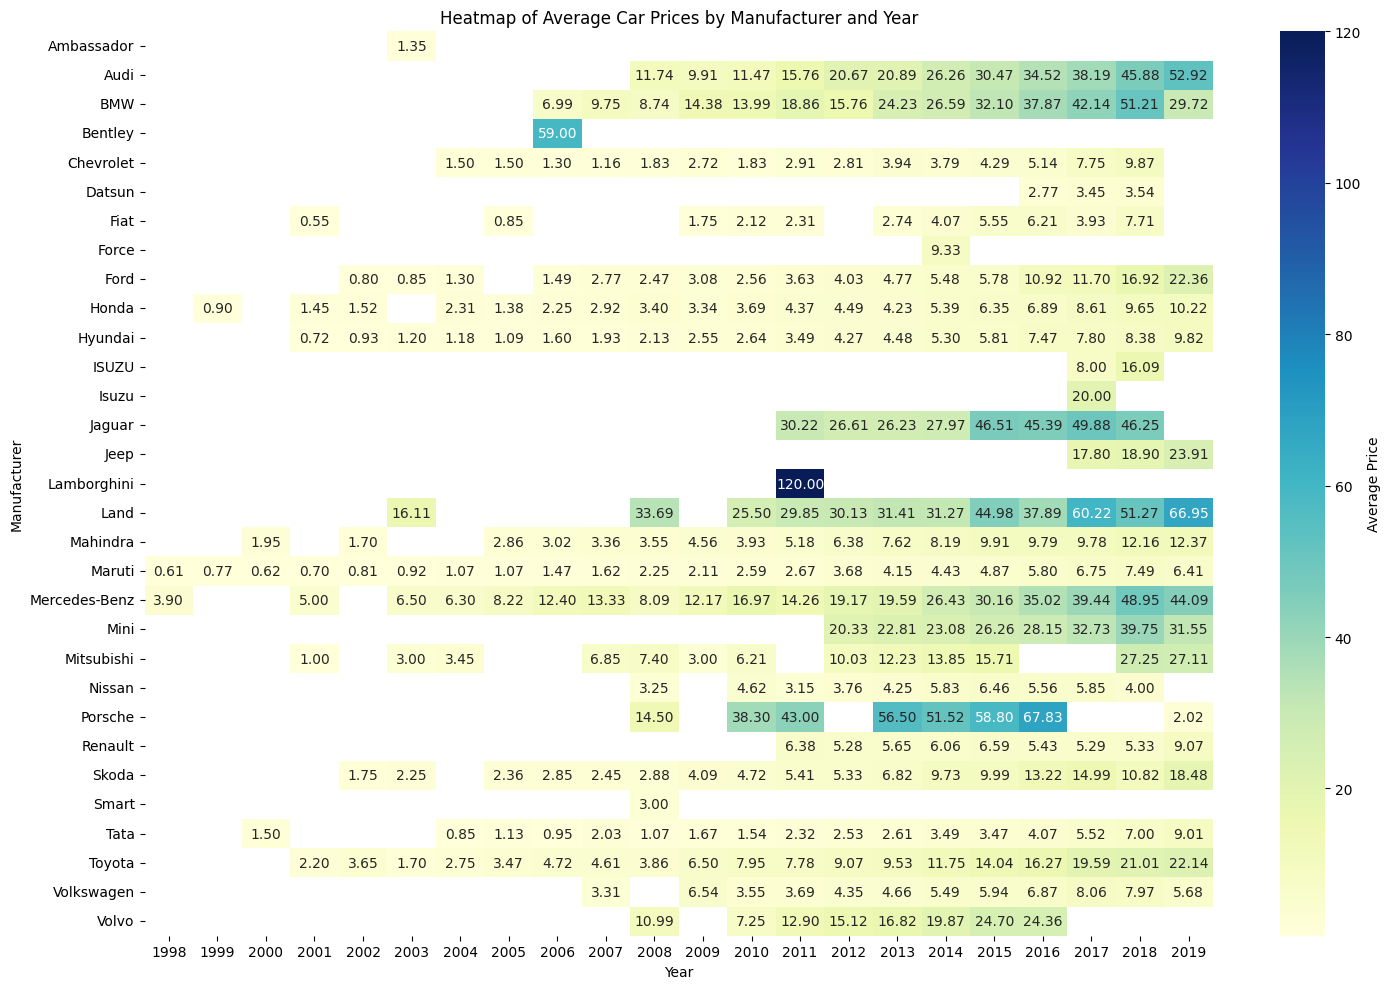

In [125]:
# Tính trung bình giá xe của mỗi loại xe cho mỗi năm
average_prices = test.groupby(['Year', 'Manufacturer'])['Price'].mean().reset_index()

# Tạo biểu đồ heatmap
plt.figure(figsize=(15, 10))
heatmap_data = average_prices.pivot_table(index="Manufacturer", columns="Year", values="Price", aggfunc="mean")
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Price'})
plt.title('Heatmap of Average Car Prices by Manufacturer and Year')
plt.xlabel('Year')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()

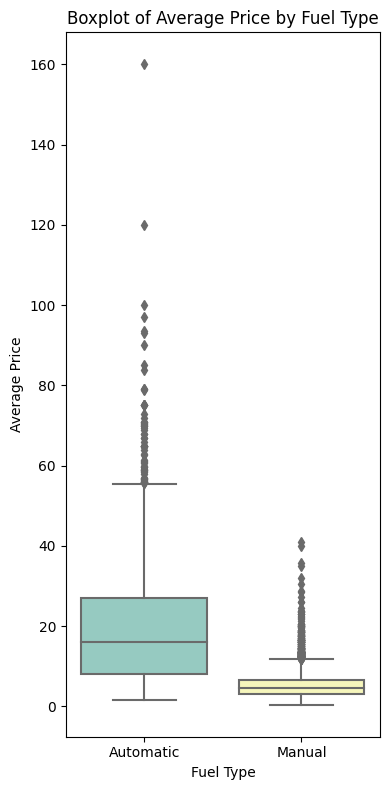

In [126]:
average_prices = test.groupby('Transmission')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)

# Vẽ biểu đồ boxplot cho trung bình giá
plt.figure(figsize=(4, 8))
sns.boxplot(x='Transmission', y='Price', data=test, order=average_prices['Transmission'], palette="Set3")
plt.title('Boxplot of Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Hồi quy tuyến tính

## Đơn biến



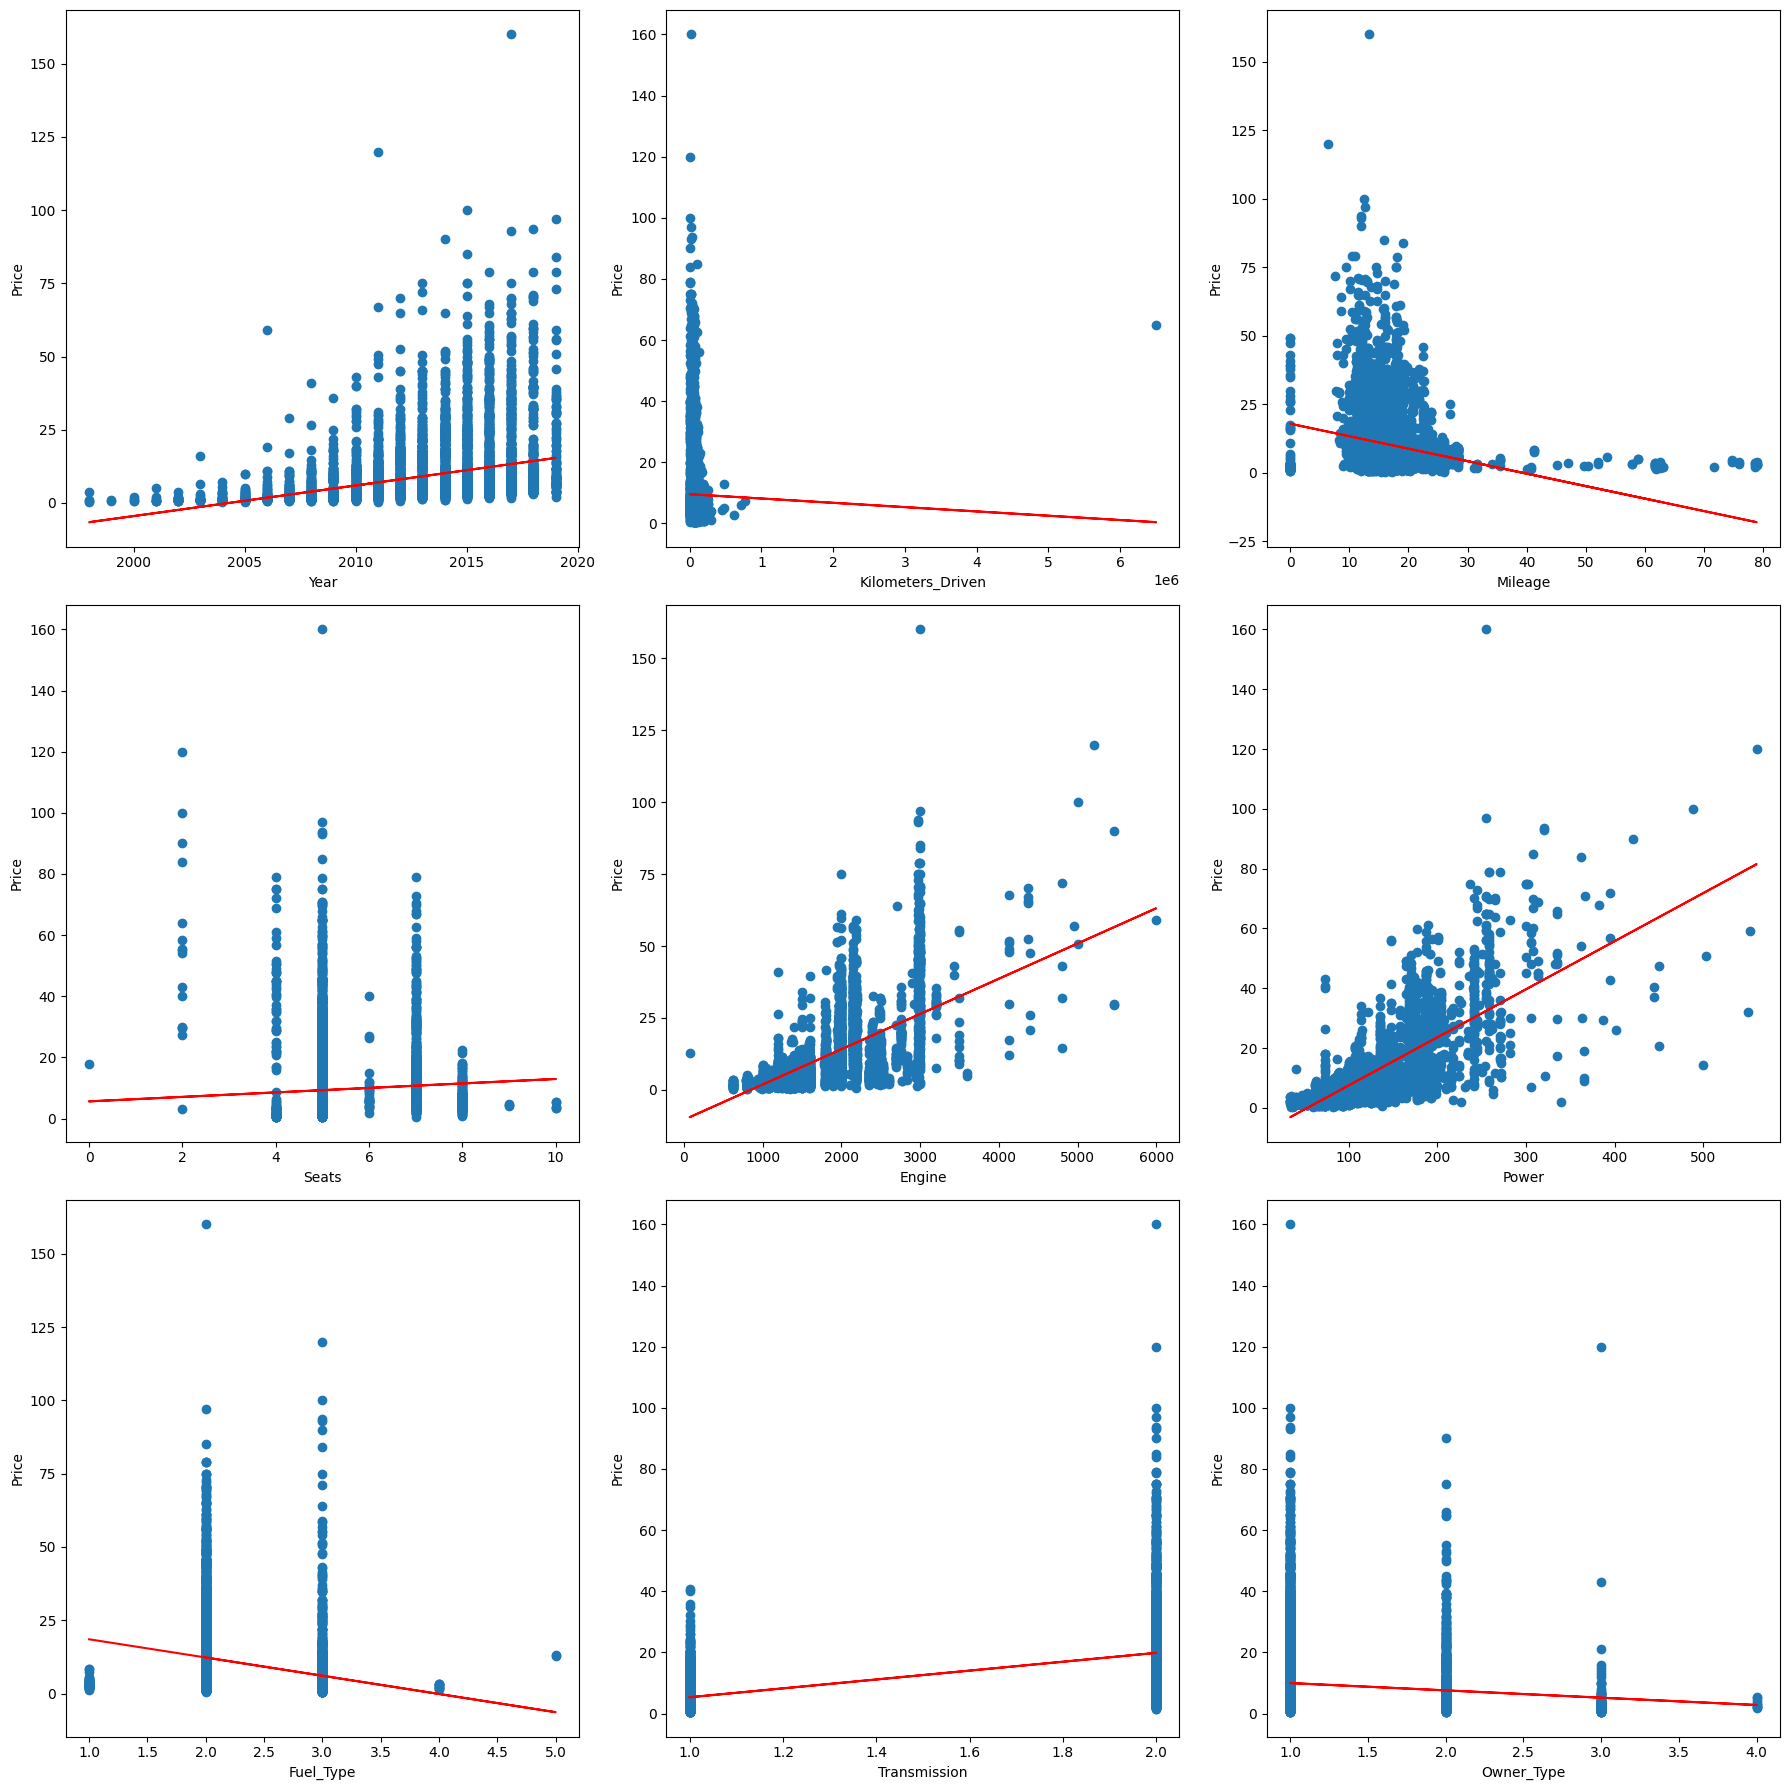

In [127]:
X = dataFrame[['Year','Kilometers_Driven','Mileage','Seats','Engine','Power','Fuel_Type','Transmission','Owner_Type']]
Y = dataFrame['Price']

fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Lặp qua mỗi cột trong X và vẽ biểu đồ scatter tương ứng và đường hồi quy tuyến tính
for i, ax in enumerate(axes.flat):
    if i < len(X.columns):  # Đảm bảo không vượt quá số lượng cột
        # Vẽ biểu đồ scatter
        ax.scatter(X.iloc[:, i], Y)
        # Tính đường hồi quy tuyến tính
        fit = np.polyfit(X.iloc[:, i], Y, deg=1)
        ax.plot(X.iloc[:, i], fit[0] * X.iloc[:, i] + fit[1], color='red')
        ax.set_xlabel(X.columns[i])
        ax.set_ylabel('Price')
plt.tight_layout()  # Đảm bảo không gian giữa các subplot
plt.show()

## Đa biến


In [128]:
# Thêm cột hằng số vào X
X = dataFrame[['Year','Kilometers_Driven','Mileage','Seats','Engine','Power','Fuel_Type','Transmission','Owner_Type']]
X = sm.add_constant(X)  # Thêm cột hằng số (intercept) vào X
# Biến phụ thuộc
Y = dataFrame['Price']
# Khởi tạo và fit mô hình OLS
model_OLS = sm.OLS(Y, X).fit()
# Hiển thị bảng OLS
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1476.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:44:09   Log-Likelihood:                -19564.
No. Observations:                6019   AIC:                         3.915e+04
Df Residuals:                    6009   BIC:                         3.921e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1924.4463     57.73

In [129]:
# train model
# tạo data
X = dataFrame[['Year','Kilometers_Driven','Mileage','Seats','Engine','Power','Fuel_Type','Transmission','Owner_Type']]
Y = dataFrame['Price']

# chia tập train và test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 )
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

# tạo model
model = LinearRegression()

# train model
model.fit(X_train, Y_train)

# ktra độ chính xác
Y_pred = model.predict(X_test)
print(Y_pred.shape)

# Tính MSE và R-squared
mse = mean_squared_error(Y_test, Y_pred) # Đo lường trung bình của bình phương sai số
r2 = r2_score(Y_test, Y_pred)

# In ra MSE và R-squared
print('Mean Squared Error:', mse)
print('R-squared:', r2)

print('R Square: ', model.score(X, Y))
print('Slope: ', model.coef_)
print('intercept: ', model.intercept_)

(4815, 9) (1204, 9) (4815,) (1204,)
(1204,)
Mean Squared Error: 34.664566295044416
R-squared: 0.7269038833231319
R Square:  0.688329684146167
Slope:  [ 9.55687983e-01  1.72494321e-06 -1.02432987e-01 -1.24924024e+00
  1.92292131e-03  1.14080732e-01 -2.10572948e+00  2.83656854e+00
 -4.83858719e-02]
intercept:  -1920.6948296298601


In [130]:
# Define the function that will be used to make predictions
def my_function(Year_input, Kilometers_Driven_input, Mileage_input, Seats_input, Engine_Number_input, Power_Number_input, Fuel_Type_input, Transmission_input, Owner_Type_input):
    x = np.array([[Year_input, Kilometers_Driven_input, Mileage_input, Seats_input, Engine_Number_input, Power_Number_input, Fuel_Type_input, Transmission_input, Owner_Type_input]])
    result = model.predict(x)
    return  result, mean_squared_error(Y_test, Y_pred), r2_score(Y_test, Y_pred), model.score(X, Y), model.coef_, model.intercept_

# Create the user interface
inputs = [
    gr.Number(label="Nhap Year:"),
    gr.Number(label="Nhập Kilometers_Driven: "),
    gr.Number(label="Nhập Mileage: "),
    gr.Number(label="Nhập Seats: "),
    gr.Number(label="Nhập Engine_Number: "),
    gr.Number(label="Nhập Power_Number: "),
    gr.Number(label="Nhập Fuel_Type('CNG': 1, 'Diesel': 2, 'Petrol': 3, 'LPG': 4): "),
    gr.Number(label="Nhập Transmission('Manual': 1, 'Automatic': 2): "),
    gr.Number(label="Nhập Owner_Type('First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4): ")
]

outputs = [
    gr.Number(label='Dự đoán giá cho các thông số đầu vào là'),
    gr.Number(label='Mean Squared Error:'),
    gr.Number(label='R-squared:'),
    gr.Number(label='R Square:'),
    gr.Text(label='Slope'),
    gr.Number(label='intercept')
]

interface = gr.Interface(fn=my_function, inputs=inputs, outputs=outputs, title="Dự đoán giá xe",
                         description="Mô tả của giao diện")

# Launch the interface
interface.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


## Đề xuất

In [131]:
# Test Ridge Regression

from sklearn.ensemble import RandomForestRegressor
from joblib import dump

# Giả sử bạn đã có X và Y từ đoạn code trước
X = dataFrame.drop('Price', axis=1)
Y = dataFrame['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Huấn luyện mô hình RandomForestRegressor
n_estimators_value = 100  # Số cây trong rừng, bạn có thể điều chỉnh để tối ưu mô hình
model_2 = RandomForestRegressor(n_estimators=n_estimators_value, random_state=42)
model_2.fit(X_train, Y_train)

# Lưu mô hình
# dump(model, 'random_forest_model.joblib')

# Dự đoán trên tập kiểm tra và in ra các metric đánh giá
Y_pred = model_2.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 1.73
Mean Squared Error (MSE): 17.69
R^2 Score: 0.86
